In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from personality.constants import DATA_PATH

PATH = f"{DATA_PATH}/robustness/qwen-2.5-7b-it"

In [10]:
f1 = pd.read_json(f"{PATH}/f1.jsonl", orient="records", lines=True)
acc = pd.read_json(f"{PATH}/acc.jsonl", orient="records", lines=True)

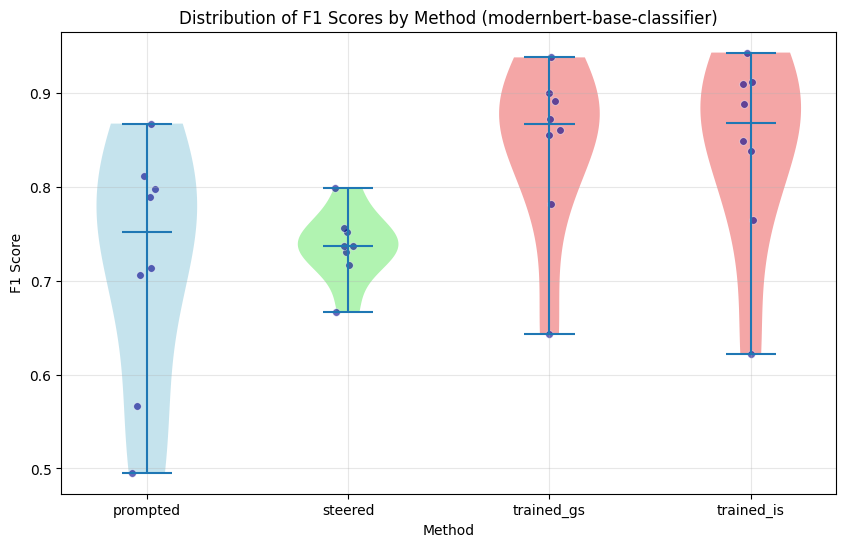

In [11]:
# Filter data to only include modernbert-base-classifier
filtered_f1 = f1[~f1["variant"].isin(["default", "all"])]

# Create the violin plot
plt.figure(figsize=(10, 6))
methods = ['prompted', 'steered', 'trained_gs', 'trained_is']
data_for_violinplot = [filtered_f1[filtered_f1['method'] == method]['score'] for method in methods]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcoral']

violin_parts = plt.violinplot(data_for_violinplot, positions=range(1, len(methods) + 1), showextrema=True, showmedians=True)

# Color each violin with different colors
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Add individual points with jitter
import numpy as np
for i, method in enumerate(methods):
    method_data = filtered_f1[filtered_f1['method'] == method]['score']
    x_position = i + 1
    # Add random jitter to x-axis for better visibility
    x_jitter = np.random.normal(0, 0.04, size=len(method_data))
    plt.scatter(x_position + x_jitter, method_data, alpha=0.6, s=30, color='darkblue', edgecolors='white', linewidth=0.5)

plt.xticks(range(1, len(methods) + 1), methods)
plt.xlabel('Method')
plt.ylabel('F1 Score')
plt.title('Distribution of F1 Scores by Method (modernbert-base-classifier)')
plt.grid(True, alpha=0.3)
plt.show()